In [78]:
#Import all required libraries for the model building and evaluation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [80]:
#Display maximum columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [81]:
# Read the data from the test.csv file
df = pd.read_csv('train.csv');
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [82]:
# Check the data in data frame using describe and info
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [84]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [85]:
# Some columns like 'YearRemodAdd', 'GarageYrBlt' and 'MoSold' are having no much importance in predicting the price 
# lets drop these columns
df.drop(['YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [86]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,WD,Normal,250000


In [87]:
# 'OverallQual', 'OverallCond', 'MSSubClass', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
# 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars' are categorical columns
# but in the original dataset the types of these columns are numeric. 
# Hence converting these columns to categorical

# Converting column type for categorical variable from numeric to object
df['MSSubClass'] = df['MSSubClass'].astype('category')
df['OverallQual'] = df['OverallQual'].astype('category')
df['OverallCond'] = df['OverallCond'].astype('category')
df['BsmtFullBath'] = df['BsmtFullBath'].astype('category')
df['BsmtHalfBath'] = df['BsmtHalfBath'].astype('category')
df['FullBath'] = df['FullBath'].astype('category')
df['HalfBath'] = df['HalfBath'].astype('category')
df['BedroomAbvGr'] = df['BedroomAbvGr'].astype('category')
df['KitchenAbvGr'] = df['KitchenAbvGr'].astype('category')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('category')
df['Fireplaces'] = df['Fireplaces'].astype('category')
df['GarageCars'] = df['GarageCars'].astype('category')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   ca

In [89]:
# Id column doesnt have any significant in predicting the price other than denoting the S.No we can drop it
df.drop(['Id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1460 non-null   category
 1   MSZoning       1460 non-null   object  
 2   LotFrontage    1201 non-null   float64 
 3   LotArea        1460 non-null   int64   
 4   Street         1460 non-null   object  
 5   Alley          91 non-null     object  
 6   LotShape       1460 non-null   object  
 7   LandContour    1460 non-null   object  
 8   Utilities      1460 non-null   object  
 9   LotConfig      1460 non-null   object  
 10  LandSlope      1460 non-null   object  
 11  Neighborhood   1460 non-null   object  
 12  Condition1     1460 non-null   object  
 13  Condition2     1460 non-null   object  
 14  BldgType       1460 non-null   object  
 15  HouseStyle     1460 non-null   object  
 16  OverallQual    1460 non-null   category
 17  OverallCond    1460 non-null   ca

In [90]:
# In data definition we have seen that for some categorical columns, we have NA as value with represents 
# 'No Such feature available' for that particular category instead of placing NULL.
# So, before treating NULL Values lets replace those NA with its respective values

# Columns having such data are:
    # Alley
    # BsmtQual
    # BsmtCond
    # BsmtExposure
    # BsmtFinType1
    # BsmtFinType2
    # FireplaceQu
    # GarageType
    # GarageFinish
    # GarageQual
    # GarageCond
    # PoolQC
    # Fence
    # MiscFeature

df['Alley'] = df['Alley'].replace(np.nan, 'No Alley')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No Fireplace')
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['PoolQC'] = df['PoolQC'].replace(np.nan, 'No Pool')
df['Fence'] = df['Fence'].replace(np.nan, 'No Fence')
df['MiscFeature'] = df['MiscFeature'].replace(np.nan, 'No MiscFeature')

In [91]:
# Checking percentage of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
LotFrontage,17.74
MasVnrType,0.55
MasVnrArea,0.55
Electrical,0.07
KitchenAbvGr,0.00
FireplaceQu,0.00
Fireplaces,0.00
Functional,0.00
TotRmsAbvGrd,0.00
KitchenQual,0.00


In [92]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [93]:
# We can see that mean and median are almost same (70) for LotFrontage column. 
# Let us impute the missing values for LotFrontage with median because the column may have few outliers.
df.loc[np.isnan(df['LotFrontage']), 'LotFrontage'] = df['LotFrontage'].median()

In [94]:
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [95]:
# Treating the missing values for MasVnrArea column
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [96]:
# We can see that there is a large difference between min and max, there is a large standard deviation as well.
# So, better to remove null records instead of imputing it with some data

# Deleting the rows for missing values in MasVnrArea
df = df[~np.isnan(df['MasVnrArea'])]

In [97]:
# Treating missing values for Electrical column
# Let us check the count for values in Electrical 
df['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [98]:
# Imputing Electrical column missing values with SBrkr
df.loc[pd.isnull(df['Electrical']), ['Electrical']] = 'SBrkr'

In [99]:
# Lets again check the percentage of missing values in columns
(round(100*(df.isnull().sum()/len(df.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

,Nulls
MSSubClass,0.0
HalfBath,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0
FullBath,0.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   MSSubClass     1452 non-null   category
 1   MSZoning       1452 non-null   object  
 2   LotFrontage    1452 non-null   float64 
 3   LotArea        1452 non-null   int64   
 4   Street         1452 non-null   object  
 5   Alley          1452 non-null   object  
 6   LotShape       1452 non-null   object  
 7   LandContour    1452 non-null   object  
 8   Utilities      1452 non-null   object  
 9   LotConfig      1452 non-null   object  
 10  LandSlope      1452 non-null   object  
 11  Neighborhood   1452 non-null   object  
 12  Condition1     1452 non-null   object  
 13  Condition2     1452 non-null   object  
 14  BldgType       1452 non-null   object  
 15  HouseStyle     1452 non-null   object  
 16  OverallQual    1452 non-null   category
 17  OverallCond    1452 non-null   ca

In [101]:
# Numeric columns list
numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)
numeric_cols

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [102]:
len(numeric_cols)

21

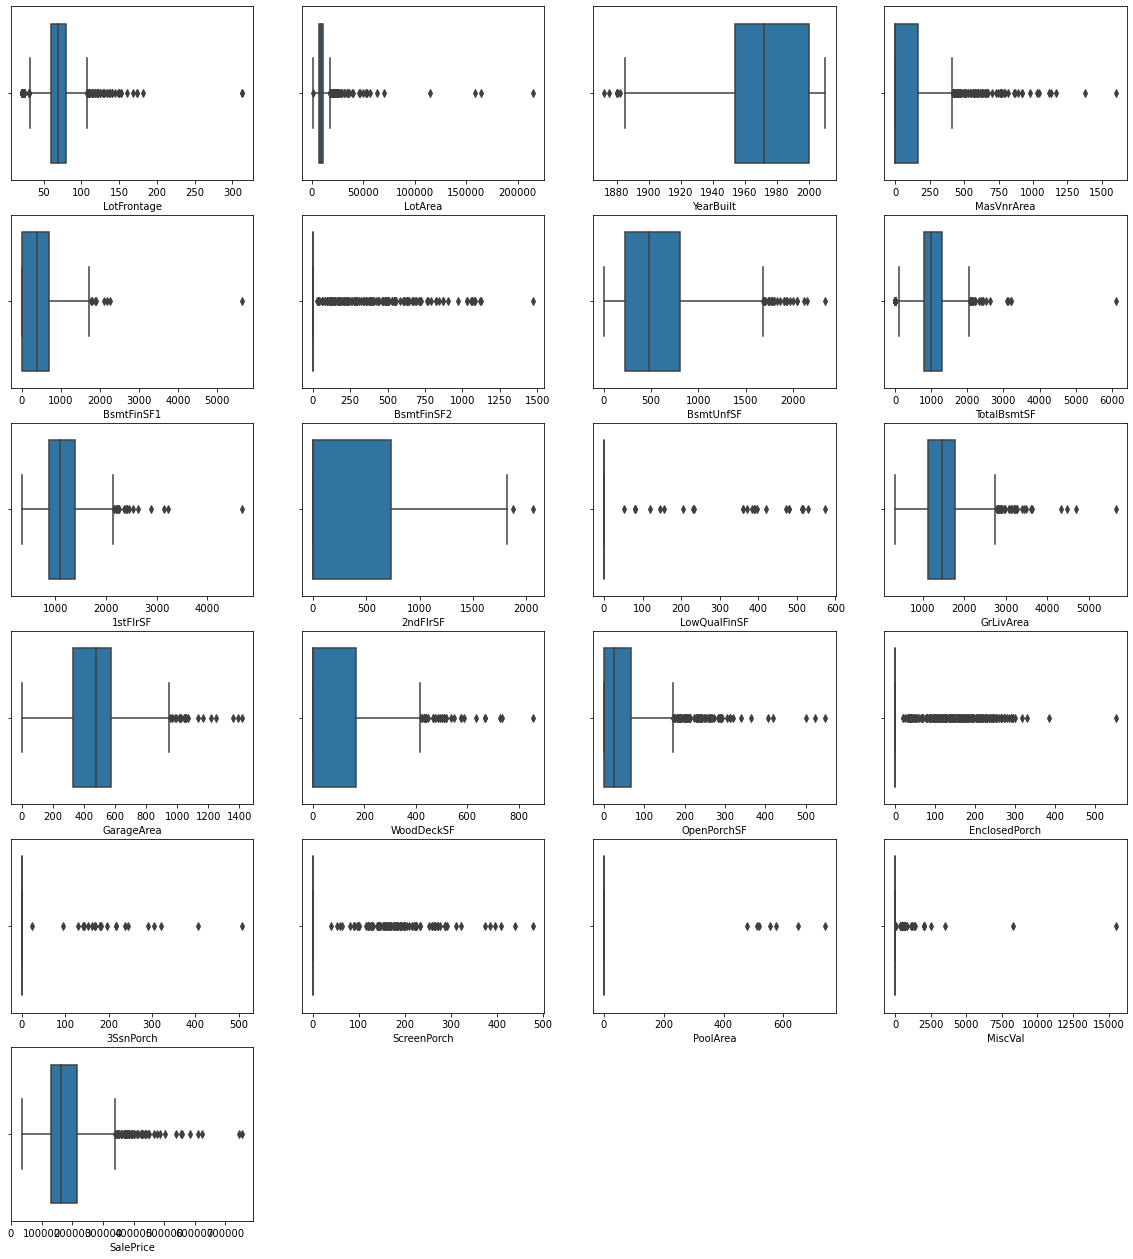

In [103]:
# Plotting the spread of the numeric columns
plt.figure(figsize=(20,30))
for i in enumerate(numeric_cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=df)

In [104]:
df_numeric_cols = df[numeric_cols];
df_numeric_cols.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,69.847796,10507.276171,1971.116391,103.685262,441.970386,46.805785,567.070937,1055.847107,1161.270661,346.944215,5.876722,1514.091598,472.475207,94.416667,46.390496,21.937328,3.428375,15.143939,2.774105,43.728650,180615.063361
std,22.036987,9989.563592,30.193761,181.066207,455.360279,161.726239,442.082927,438.119089,385.018424,436.370724,48.754995,525.627765,214.106397,125.393706,66.048619,61.089879,29.396943,55.899665,40.287389,497.478278,79285.541485
min,21.000000,1300.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,60.000000,7538.750000,1954.000000,0.000000,0.000000,0.000000,222.500000,794.750000,882.000000,0.000000,0.000000,1128.000000,327.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129900.000000
50%,69.000000,9478.500000,1972.000000,0.000000,381.000000,0.000000,477.500000,990.500000,1086.000000,0.000000,0.000000,1461.500000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,162700.000000
75%,79.000000,11600.000000,2000.000000,166.000000,706.500000,0.000000,808.000000,1297.250000,1391.000000,728.000000,0.000000,1776.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
90%,92.000000,14373.900000,2006.000000,335.000000,1063.500000,118.800000,1231.600000,1601.800000,1679.900000,953.600000,0.000000,2157.900000,756.900000,261.900000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,277950.000000
95%,104.000000,17299.350000,2007.000000,456.000000,1271.800000,397.800000,1468.000000,1748.700000,1826.900000,1141.450000,0.000000,2463.800000,848.700000,335.000000,172.900000,180.000000,0.000000,160.000000,0.000000,0.000000,325793.200000
99%,137.490000,37775.960000,2009.000000,791.920000,1572.490000,831.820000,1797.450000,2155.450000,2211.900000,1419.880000,360.000000,3125.720000,1004.310000,505.940000,285.980000,261.450000,168.000000,268.450000,0.000000,700.000000,439377.800000


In [105]:
# List of categorical columns
category_cols = df.select_dtypes(include=['object', 'category']).columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [106]:
len(category_cols)

55

In [107]:
# Value count for each categorical column
for col in list(category_cols):
    print(df[col].value_counts())

20     532
60     296
50     144
120     86
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
RL         1146
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1446
Grvl       6
Name: Street, dtype: int64
No Alley    1362
Grvl          50
Pave          40
Name: Alley, dtype: int64
Reg    919
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1303
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1451
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1046
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1374
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor    

In [108]:
df.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

In [109]:
df = df.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})

In [110]:
# Creating dummy variable
mz = pd.get_dummies(df['MSZoning'], prefix = 'MSZoning')
# Dropping MSZoning_Other column
mz = mz.drop('MSZoning_Other', axis=1)
# Adding result to master df
df = pd.concat([df, mz], axis=1)
# Dropping original variable
df = df.drop('MSZoning', axis=1)

In [111]:
'PoolQC_No Pool','SaleType_New','BsmtFinType2_No Basement','BsmtExposure_No Basement','ExterQual_Gd','HouseStyle_1.5Unf','RoofStyle_Gable','HouseStyle_SLvl','FullBath_1','MiscFeature_Shed','Exterior1st_CemntBd','Exterior2nd_MetalSd','KitchenAbvGr_1','Exterior2nd_VinylSd','BldgType_2fmCon'



df = df.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})

# Creating dummy variable
ls = pd.get_dummies(df['LotShape'], prefix = 'LotShape')
# Dropping Other column
ls = ls.drop('LotShape_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ls], axis=1)
# Dropping original variable
df = df.drop('LotShape', axis=1)


df = df.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})
# Creating dummy variable
lc = pd.get_dummies(df['LotConfig'], prefix = 'LotConfig')
# Dropping Other column
lc = lc.drop('LotConfig_Other', axis=1)
# Adding result to master df
df = pd.concat([df, lc], axis=1)
# Dropping original variable
df = df.drop('LotConfig', axis=1)

df = df.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})
								 
# Creating dummy variable
nh = pd.get_dummies(df['Neighborhood'], prefix = 'Neighborhood')
# Dropping Other column
nh = nh.drop('Neighborhood_Other', axis=1)
# Adding result to master df
df = pd.concat([df, nh], axis=1)
# Dropping original variable
df = df.drop('Neighborhood', axis=1)


df = df.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})
							   
# Creating dummy variable
co = pd.get_dummies(df['Condition1'], prefix = 'Condition1')
# Dropping Other column
co = co.drop('Condition1_Other', axis=1)
# Adding result to master df
df = pd.concat([df, co], axis=1)
# Dropping original variable
df = df.drop('Condition1', axis=1)


df = df.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})

# Creating dummy variable
hs = pd.get_dummies(df['HouseStyle'], prefix = 'HouseStyle')
# Dropping Other column
hs = hs.drop('HouseStyle_Other', axis=1)
# Adding result to master df
df = pd.concat([df, hs], axis=1)
# Dropping original variable
df = df.drop('HouseStyle', axis=1)


df = df.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}})

# Creating dummy variable
oq = pd.get_dummies(df['OverallQual'], prefix = 'OverallQual')
# Dropping Other column
oq = oq.drop('OverallQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, oq], axis=1)
# Dropping original variable
df = df.drop('OverallQual', axis=1)

df = df.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})

# Creating dummy variable
oc = pd.get_dummies(df['OverallCond'], prefix = 'OverallCond')
# Dropping Other column
oc = oc.drop('OverallCond_Other', axis=1)
# Adding result to master df
df = pd.concat([df, oc], axis=1)
# Dropping original variable
df = df.drop('OverallCond', axis=1)


df = df.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})

# Creating dummy variable
rs = pd.get_dummies(df['RoofStyle'], prefix = 'RoofStyle')
# Dropping Other column
rs = rs.drop('RoofStyle_Other', axis=1)
# Adding result to master df
df = pd.concat([df, rs], axis=1)
# Dropping original variable
df = df.drop('RoofStyle', axis=1)


df = df.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})
							  
# Creating dummy variable
ex = pd.get_dummies(df['Exterior1st'], prefix = 'Exterior1st')
# Dropping Other column
ex = ex.drop('Exterior1st_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ex], axis=1)
# Dropping original variable
df = df.drop('Exterior1st', axis=1)


df = df.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})

# Creating dummy variable
ex2 = pd.get_dummies(df['Exterior2nd'], prefix = 'Exterior2nd')
# Dropping Other column
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ex2], axis=1)
# Dropping original variable
df = df.drop('Exterior2nd', axis=1)	


# Creating dummy variable
mv = pd.get_dummies(df['MasVnrType'], prefix = 'MasVnrType')
# Dropping Other column
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
# Adding result to master df
df = pd.concat([df, mv], axis=1)
# Dropping original variable
df = df.drop('MasVnrType', axis=1)


df = df.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})

# Creating dummy variable
exq = pd.get_dummies(df['ExterQual'], prefix = 'ExterQual')
# Dropping Other column
exq = exq.drop('ExterQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, exq], axis=1)
# Dropping original variable
df = df.drop('ExterQual', axis=1)


df = df.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})

# Creating dummy variable
fo = pd.get_dummies(df['Foundation'], prefix = 'Foundation')
# Dropping Other column
fo = fo.drop('Foundation_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fo], axis=1)
# Dropping original variable
df = df.drop('Foundation', axis=1)


df = df.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})

# Creating dummy variable
bq = pd.get_dummies(df['BsmtQual'], prefix = 'BsmtQual')
# Dropping Other column
bq = bq.drop('BsmtQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, bq], axis=1)
# Dropping original variable
df = df.drop('BsmtQual', axis=1)


# Creating dummy variable
be = pd.get_dummies(df['BsmtExposure'], prefix = 'BsmtExposure')
# Dropping Other column
be = be.drop('BsmtExposure_No Basement', axis=1)
# Adding result to master df
df = pd.concat([df, be], axis=1)
# Dropping original variable
df = df.drop('BsmtExposure', axis=1)

# Creating dummy variable
bf = pd.get_dummies(df['BsmtFinType1'], prefix = 'BsmtFinType1')
# Dropping Other column
bf = bf.drop('BsmtFinType1_No Basement', axis=1)
# Adding result to master df
df = pd.concat([df, bf], axis=1)
# Dropping original variable
df = df.drop('BsmtFinType1', axis=1)


df = df.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})

# Creating dummy variable
hc = pd.get_dummies(df['HeatingQC'], prefix = 'HeatingQC')
# Dropping Other column
hc = hc.drop('HeatingQC_Other', axis=1)
# Adding result to master df
df = pd.concat([df, hc], axis=1)
# Dropping original variable
df = df.drop('HeatingQC', axis=1)


df = df.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})

# Creating dummy variable
kq = pd.get_dummies(df['KitchenQual'], prefix = 'KitchenQual')
# Dropping Other column
kq = kq.drop('KitchenQual_Other', axis=1)
# Adding result to master df
df = pd.concat([df, kq], axis=1)
# Dropping original variable
df = df.drop('KitchenQual', axis=1)


df = df.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})

# Creating dummy variable
fq = pd.get_dummies(df['FireplaceQu'], prefix = 'FireplaceQu')
# Dropping Other column
fq = fq.drop('FireplaceQu_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fq], axis=1)
# Dropping original variable
df = df.drop('FireplaceQu', axis=1)

df = df.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})

# Creating dummy variable
gt = pd.get_dummies(df['GarageType'], prefix = 'GarageType')
# Dropping Other column
gt = gt.drop('GarageType_Other', axis=1)
# Adding result to master df
df = pd.concat([df, gt], axis=1)
# Dropping original variable
df = df.drop('GarageType', axis=1)


# Creating dummy variable
gf = pd.get_dummies(df['GarageFinish'], prefix = 'GarageFinish')
# Dropping Other column
gf = gf.drop('GarageFinish_No Garage', axis=1)
# Adding result to master df
df = pd.concat([df, gf], axis=1)
# Dropping original variable
df = df.drop('GarageFinish', axis=1)


df = df.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})

# Creating dummy variable
fe = pd.get_dummies(df['Fence'], prefix = 'Fence')
# Dropping Other column
fe = fe.drop('Fence_Other', axis=1)
# Adding result to master df
df = pd.concat([df, fe], axis=1)
# Dropping original variable
df = df.drop('Fence', axis=1)


df = df.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})

# Creating dummy variable
se = pd.get_dummies(df['SaleCondition'], prefix = 'SaleCondition')
# Dropping Other column
se = se.drop('SaleCondition_Other', axis=1)
# Adding result to master df
df = pd.concat([df, se], axis=1)
# Dropping original variable
df = df.drop('SaleCondition', axis=1)


df = df.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})

# Creating dummy variable
ms = pd.get_dummies(df['MSSubClass'], prefix = 'MSSubClass')
# Dropping Other column
ms = ms.drop('MSSubClass_Other', axis=1)
# Adding result to master df
df = pd.concat([df, ms], axis=1)
# Dropping original variable
df = df.drop('MSSubClass', axis=1)

In [112]:
df.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
0,65.0,8450,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,208500,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,181500,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
2,68.0,11250,2001,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,223500,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
3,60.0,9550,1915,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,140000,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,250000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Columns: 119 entries, LotFrontage to MSSubClass_120
dtypes: category(9), float64(2), int64(19), uint8(89)
memory usage: 390.5 KB


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

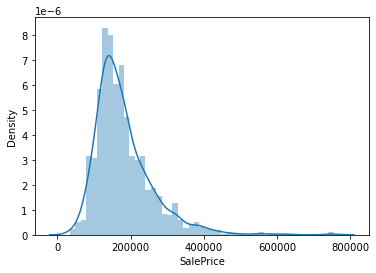

In [114]:
# Checking target variable distribution
sns.distplot(df['SalePrice'])

In [115]:
# Skewness of the target variable
df['SalePrice'].skew()

1.8840445160660748

In [116]:
# Split the data for training and testing in 8:2 ratio for building the model
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1161, 119)
(291, 119)


In [117]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 744 to 795
Columns: 119 entries, LotFrontage to MSSubClass_120
dtypes: category(9), float64(2), int64(19), uint8(89)
memory usage: 312.7 KB


In [118]:
df_train.select_dtypes(include=['int64', 'float64']).columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

In [119]:
# Just convert the data using MinMaxScaler so that any kind of outliers also will be removed from data

# Instantiate the scaler
min_max_scaler = MinMaxScaler()

# Do sacling for numeric columns in the training data set
# Y only numeric bcz other categorical columns are already in between 0 & 1.
numeric_cols = list(df_train.select_dtypes(include=['int64', 'float64']).columns)

# Fit the data into scaler and transform
df_train[numeric_cols] = min_max_scaler.fit_transform(df_train[numeric_cols])

# View data once scaling is done
df_train.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
744,0.068493,0.019140,0.876812,0.000000,0.129872,0.000000,0.258562,0.218822,0.230151,0.000000,0.0,0.188960,1,0,2,0,2,1,5,1,2,0.325811,0.112019,0.000000,0.126812,0.330709,0.000000,0.0,0.0,0.204337,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1
1184,0.099315,0.158139,0.659420,0.141250,0.205351,0.000000,0.176798,0.257283,0.284075,0.000000,0.0,0.233233,1,0,1,1,3,1,5,2,3,0.701693,0.000000,0.502868,0.000000,0.000000,0.597727,0.0,0.0,0.213773,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
369,0.164384,0.039870,0.630435,0.000000,0.012757,0.228926,0.313784,0.173977,0.218678,0.000000,0.0,0.179540,1,0,1,0,3,1,7,1,2,0.406206,0.424737,0.032505,0.000000,0.000000,0.413636,0.0,0.0,0.178989,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0
627,0.202055,0.038795,0.601449,0.102500,0.119419,0.117125,0.149829,0.189198,0.272143,0.000000,0.0,0.223436,1,0,1,0,3,1,7,2,1,0.256700,0.000000,0.000000,0.342391,0.000000,0.000000,0.0,0.0,0.166315,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
517,0.198630,0.041637,0.898551,0.575625,0.000000,0.000000,0.541096,0.206874,0.216384,0.516707,0.0,0.378674,0,0,2,1,3,1,7,1,3,0.626939,0.256709,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.324039,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0


In [120]:
# Now we can find all columns having max as 1 and min around 0
df_train[numeric_cols].describe()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,0.167289,0.043499,0.718122,0.063119,0.078741,0.041621,0.241474,0.172734,0.189769,0.169395,0.011028,0.222776,0.331517,0.107816,0.089784,0.042085,0.008093,0.032237,0.003607,0.003023,0.204468
std,0.077643,0.050392,0.219012,0.111605,0.081680,0.143521,0.187782,0.072941,0.090099,0.210580,0.090085,0.098947,0.152481,0.142938,0.127378,0.114133,0.063779,0.120454,0.055187,0.035046,0.109599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.029143,0.594203,0.000000,0.000000,0.000000,0.093750,0.129787,0.125746,0.000000,0.000000,0.149209,0.232722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.133221
50%,0.164384,0.038290,0.724638,0.000000,0.068037,0.000000,0.205051,0.162193,0.171179,0.000000,0.000000,0.211379,0.337094,0.000000,0.045889,0.000000,0.000000,0.000000,0.000000,0.000000,0.180397
75%,0.195205,0.047676,0.927536,0.102500,0.124911,0.000000,0.341610,0.210147,0.240707,0.352542,0.000000,0.274303,0.406206,0.196033,0.131931,0.000000,0.000000,0.000000,0.000000,0.000000,0.251162
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [121]:
# Variables more than 0.70 correlations 
c = df_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
df_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(df_corr[(df_corr[0] < 1) & (df_corr[0] > 0.7)])

                                                0
Exterior1st_VinylSd Exterior2nd_VinylSd  0.979074
Exterior2nd_VinylSd Exterior1st_VinylSd  0.979074
Exterior1st_MetalSd Exterior2nd_MetalSd  0.970070
Exterior2nd_MetalSd Exterior1st_MetalSd  0.970070
MSSubClass_50       HouseStyle_1.5Fin    0.933651
HouseStyle_1.5Fin   MSSubClass_50        0.933651
RoofStyle_Gable     RoofStyle_Hip        0.924827
RoofStyle_Hip       RoofStyle_Gable      0.924827
LotShape_IR1        LotShape_Reg         0.919456
LotShape_Reg        LotShape_IR1         0.919456
ExterQual_TA        ExterQual_Gd         0.908388
ExterQual_Gd        ExterQual_TA         0.908388
Exterior2nd_HdBoard Exterior1st_HdBoard  0.868316
Exterior1st_HdBoard Exterior2nd_HdBoard  0.868316
Exterior2nd_Wd Sdng Exterior1st_Wd Sdng  0.861187
Exterior1st_Wd Sdng Exterior2nd_Wd Sdng  0.861187
KitchenQual_TA      KitchenQual_Gd       0.829714
KitchenQual_Gd      KitchenQual_TA       0.829714
TotalBsmtSF         1stFlrSF             0.820468


In [122]:
df_train = df_train.drop(['Exterior2nd_VinylSd','Exterior2nd_MetalSd','HouseStyle_1.5Fin','RoofStyle_Hip','LotShape_IR1',
                         'ExterQual_Gd','Fireplaces','GarageCars','Exterior2nd_HdBoard','Exterior2nd_Wd Sdng',
                         'KitchenQual_Gd','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','MasVnrType_BrkFace',
                         'TotalBsmtSF','Foundation_CBlock','HouseStyle_1Story','BsmtQual_Gd','LotConfig_Corner',
                         'Exterior2nd_Plywood','Fence_MnPrv','GarageType_Detchd'], axis=1)

In [123]:
df_train.shape

(1161, 96)

In [124]:
# Popping out the SalePrice column for y_train
y_train = df_train.pop('SalePrice')

# Creating X_train for rest of columns
X_train = df_train

In [125]:
# Fit a model using linear regression for the given training data set

# Instantiate the linear regression
lm = LinearRegression()

# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression()

In [126]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)

# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.849058666441135

In [127]:
# Now lets create and scale test data set and predict for test data set and find the r2 score for it

# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
df_test[numeric_cols] = min_max_scaler.transform(df_test[numeric_cols]) 

df_test.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_Reg,LotConfig_Corner,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2Story,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Gd,ExterQual_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_MnPrv,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
157,0.243151,0.050027,0.992754,0.052500,0.000000,0.0,0.331336,0.126678,0.100964,0.578208,0.0,0.307837,0,0,2,1,4,1,8,1,3,0.479549,0.000000,0.143403,0.000000,0.0,0.000000,0.0,0.0,0.330376,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
337,0.167808,0.036622,0.942029,0.070625,0.143515,0.0,0.310788,0.251391,0.275815,0.000000,0.0,0.226451,1,0,2,0,3,1,7,0,2,0.375176,0.224037,0.141491,0.000000,0.0,0.000000,0.0,0.0,0.252218,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0
1120,0.130137,0.032546,0.347826,0.000000,0.000000,0.0,0.433219,0.165630,0.155576,0.000000,0.0,0.127732,0,0,1,0,2,1,6,1,1,0.217207,0.000000,0.042065,0.202899,0.0,0.000000,0.0,0.0,0.117589,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0
563,0.154110,0.095726,0.333333,0.000000,0.000000,0.0,0.497860,0.190344,0.190225,0.247458,0.0,0.252449,0,0,2,0,4,1,8,1,2,0.279267,0.084014,0.068834,0.000000,0.0,0.327273,0.0,0.0,0.211379,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0
371,0.202055,0.073944,0.630435,0.000000,0.000000,0.0,0.000000,0.000000,0.180358,0.226634,0.0,0.236247,0,0,2,0,4,1,7,1,2,0.479549,0.000000,0.112811,0.000000,0.0,0.000000,0.0,0.0,0.140166,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0


In [128]:
# popping out the SalePrice column to create y_test
y_test = df_test.pop('SalePrice')

# Creating X_test
X_test = df_test

In [129]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_RL,LotShape_Reg,LotConfig_Inside,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,RoofStyle_Gable,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,MasVnrType_None,MasVnrType_Stone,ExterQual_TA,Foundation_BrkTil,Foundation_PConc,BsmtQual_Ex,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_TA,KitchenQual_TA,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_No Garage,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,Fence_No Fence,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_20,MSSubClass_50,MSSubClass_60,MSSubClass_120
157,0.243151,0.050027,0.992754,0.052500,0.000000,0.0,0.331336,0.100964,0.578208,0.0,0.307837,0,0,2,1,4,1,0.479549,0.000000,0.143403,0.000000,0.0,0.000000,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0
337,0.167808,0.036622,0.942029,0.070625,0.143515,0.0,0.310788,0.275815,0.000000,0.0,0.226451,1,0,2,0,3,1,0.375176,0.224037,0.141491,0.000000,0.0,0.000000,0.0,0.0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0
1120,0.130137,0.032546,0.347826,0.000000,0.000000,0.0,0.433219,0.155576,0.000000,0.0,0.127732,0,0,1,0,2,1,0.217207,0.000000,0.042065,0.202899,0.0,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
563,0.154110,0.095726,0.333333,0.000000,0.000000,0.0,0.497860,0.190225,0.247458,0.0,0.252449,0,0,2,0,4,1,0.279267,0.084014,0.068834,0.000000,0.0,0.327273,0.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
371,0.202055,0.073944,0.630435,0.000000,0.000000,0.0,0.000000,0.180358,0.226634,0.0,0.236247,0,0,2,0,4,1,0.479549,0.000000,0.112811,0.000000,0.0,0.000000,0.0,0.0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0


In [130]:
# Fit the model with test set
y_test_pred = lm.predict(X_test)

# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

# We can see that r2 on training is good but when it comes to test it is working worse
# That means linear regression is not a good fit for the given model
# So, we have to go for advanced regression models like Ridge and Lasso

0.838711207235943

In [131]:
# Model parameters coefficients
model_parameters = lm.coef_

# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")

list(zip(cols, model_parameters))

[('constant', -0.052866853793088885),
 ('LotFrontage', 0.09772768804685317),
 ('LotArea', 0.0485707719598918),
 ('YearBuilt', 0.05855713039260706),
 ('MasVnrArea', 0.010312128556475973),
 ('BsmtFinSF1', 0.003010756501989287),
 ('BsmtFinSF2', 0.023164567286714913),
 ('BsmtUnfSF', 373615949971.55286),
 ('1stFlrSF', 177034634394.51642),
 ('2ndFlrSF', 44151494776.30356),
 ('LowQualFinSF', -455060454898.43695),
 ('GrLivArea', 0.01296234130859375),
 ('BsmtFullBath', 0.002117156982421875),
 ('BsmtHalfBath', 0.0145263671875),
 ('FullBath', 0.0078277587890625),
 ('HalfBath', -6.103515625e-05),
 ('BedroomAbvGr', -0.0182647705078125),
 ('KitchenAbvGr', 0.046142578125),
 ('GarageArea', 0.012928009033203125),
 ('WoodDeckSF', -0.015346527099609375),
 ('OpenPorchSF', 0.019975662231445312),
 ('EnclosedPorch', 0.03441429138183594),
 ('3SsnPorch', 0.015822410583496094),
 ('ScreenPorch', -0.007144927978515625),
 ('PoolArea', 0.0004909038543701172),
 ('MiscVal', 0.01735687255859375),
 ('MSZoning_RL', -0.0

In [134]:
metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.849058666441135
0.838711207235943
2.103181612479161
0.6696992727385086
0.0018115259366745572
0.0023013720712663525


In [57]:
# Now do regression with regularization

# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

In [58]:
# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [59]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009183,0.001586,0.005178,0.001171,0.0001,{'alpha': 0.0001},0.655012,0.739401,0.888718,0.840651,0.859136,0.796583,0.086782,23,0.884421,0.863416,0.833305,0.847031,0.842054,0.854045,0.018076
1,0.003533,0.006096,0.006248,0.007653,0.001,{'alpha': 0.001},0.655136,0.739423,0.888725,0.840659,0.859138,0.796616,0.086742,22,0.884421,0.863416,0.833305,0.847031,0.842054,0.854045,0.018076
2,0.007780,0.004653,0.007255,0.004625,0.01,{'alpha': 0.01},0.656320,0.739638,0.888799,0.840735,0.859157,0.796930,0.086354,21,0.884419,0.863416,0.833304,0.847030,0.842053,0.854044,0.018075
3,0.007978,0.000631,0.003590,0.000489,0.05,{'alpha': 0.05},0.660745,0.740569,0.889065,0.841015,0.859204,0.798120,0.084884,20,0.884383,0.863406,0.833288,0.847016,0.842040,0.854027,0.018069
4,0.003391,0.004260,0.011168,0.005537,0.1,{'alpha': 0.1},0.665171,0.741673,0.889302,0.841262,0.859198,0.799321,0.083379,19,0.884305,0.863380,0.833249,0.846981,0.842007,0.853984,0.018056


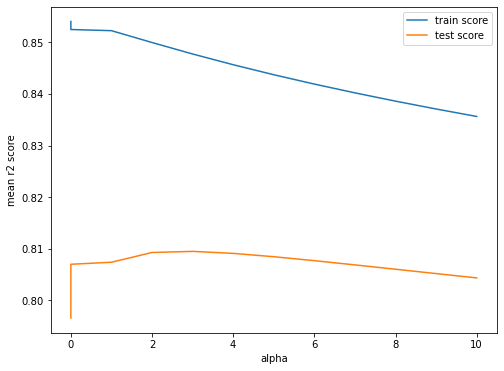

In [60]:
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [61]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 3.0}


In [62]:
# Instantiate Ridge regression with alpha=3
model_ridge = Ridge(alpha=3)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=3)

In [63]:
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8449135178497239


In [64]:
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8200891412900003


In [135]:
metric1 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric1.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric1.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric1.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric1.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric1.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric1.append(mse_test_lr**0.5)

0.849058666441135
0.838711207235943
2.103181612479161
0.6696992727385086
0.0018115259366745572
0.0023013720712663525


In [65]:
# Instantiate Lasso regression
lasso = Lasso()

# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [67]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026727,0.002310,0.004789,0.000747,0.0001,{'alpha': 0.0001},0.690268,0.758385,0.887375,0.841768,0.853320,0.806223,0.071835,1,0.880507,0.859415,0.829385,0.843454,0.837782,0.850109,0.018091
1,0.011967,0.001994,0.004388,0.000798,0.001,{'alpha': 0.001},0.717456,0.750894,0.836499,0.800453,0.770527,0.775166,0.040847,2,0.821304,0.809108,0.780909,0.793321,0.790609,0.799050,0.014350
2,0.009775,0.001163,0.004587,0.000798,0.01,{'alpha': 0.01},0.495382,0.575766,0.507503,0.519488,0.488969,0.517422,0.030990,3,0.531683,0.539901,0.500702,0.529649,0.526152,0.525617,0.013252
3,0.008378,0.000488,0.003589,0.000488,0.05,{'alpha': 0.05},-0.000036,-0.008977,-0.005599,-0.003312,-0.001624,-0.003910,0.003134,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.008982,0.001275,0.003988,0.001091,0.1,{'alpha': 0.1},-0.000036,-0.008977,-0.005599,-0.003312,-0.001624,-0.003910,0.003134,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [68]:
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

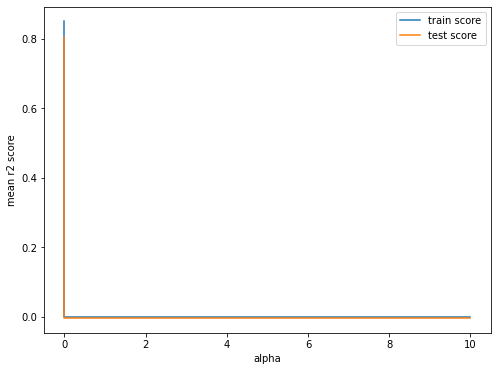

In [69]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [70]:
print(model_cv.best_params_)

{'alpha': 0.0001}


In [71]:
# Instantiate Lasso regression with alpha=0.0001
model_lasso = Lasso(0.0001)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [72]:
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.84520462185733


In [73]:
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.830058262734459


In [136]:
metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.849058666441135
0.838711207235943
2.103181612479161
0.6696992727385086
0.0018115259366745572
0.0023013720712663525


In [74]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.052),
 ('LotFrontage', -0.005),
 ('LotArea', 0.048),
 ('YearBuilt', 0.03),
 ('MasVnrArea', 0.054),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.022),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.01),
 ('LowQualFinSF', -0.038),
 ('GrLivArea', 0.332),
 ('BsmtFullBath', 0.015),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.018),
 ('HalfBath', 0.01),
 ('BedroomAbvGr', -0.0),
 ('KitchenAbvGr', -0.021),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.013),
 ('OpenPorchSF', -0.006),
 ('EnclosedPorch', 0.005),
 ('3SsnPorch', 0.004),
 ('ScreenPorch', 0.006),
 ('PoolArea', -0.0),
 ('MiscVal', 0.0),
 ('MSZoning_RL', 0.015),
 ('LotShape_Reg', -0.004),
 ('LotConfig_Inside', -0.005),
 ('Neighborhood_BrkSide', 0.006),
 ('Neighborhood_CollgCr', -0.011),
 ('Neighborhood_Crawfor', 0.035),
 ('Neighborhood_Edwards', -0.035),
 ('Neighborhood_Gilbert', -0.017),
 ('Neighborhood_NAmes', -0.01),
 ('Neighborhood_NWAmes', -0.007),
 ('Neighborhood_NridgHt', 0.029),
 ('Neighborhood_OldTown', -0.002),
 (

In [75]:
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

,Params,Coef
0,constant,0.052
1,LotFrontage,-0.005
2,LotArea,0.048
3,YearBuilt,0.030
4,MasVnrArea,0.054
7,BsmtUnfSF,0.022
9,2ndFlrSF,0.010
10,LowQualFinSF,-0.038
11,GrLivArea,0.332
12,BsmtFullBath,0.015


In [76]:
# Minus one as we have constant present in lasso_params_df
len(lasso_params_df)-1

79

In [77]:
# Sorting the parameters with their Coefficient values
lasso_params_df.sort_values('Coef',ascending=False)

,Params,Coef
11,GrLivArea,0.332
4,MasVnrArea,0.054
0,constant,0.052
63,BsmtQual_Ex,0.048
2,LotArea,0.048
18,GarageArea,0.045
31,Neighborhood_Crawfor,0.035
3,YearBuilt,0.030
66,BsmtExposure_Gd,0.029
36,Neighborhood_NridgHt,0.029


In [137]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.849059,0.849059,0.849059
1,R2 Score (Test),0.838711,0.838711,0.838711
2,RSS (Train),2.103182,2.103182,2.103182
3,RSS (Test),0.669699,0.669699,0.669699
4,MSE (Train),0.042562,0.042562,0.042562
5,MSE (Test),0.047973,0.047973,0.047973


In [140]:
betas = pd.DataFrame(index=df_train.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = model_ridge.coef_
betas['Lasso'] = model_lasso.coef_
betas

,Linear,Ridge,Lasso
LotFrontage,-5.286685e-02,-0.012296,-0.004934
LotArea,9.772769e-02,0.045131,0.047569
YearBuilt,4.857077e-02,0.022957,0.030137
MasVnrArea,5.855713e-02,0.054145,0.054220
BsmtFinSF1,1.031213e-02,0.037264,0.000000
BsmtFinSF2,3.010757e-03,0.009666,0.000000
BsmtUnfSF,2.316457e-02,0.042480,0.022122
1stFlrSF,3.736159e+11,0.092583,0.000000
2ndFlrSF,1.770346e+11,0.071055,0.009706
LowQualFinSF,4.415149e+10,-0.020077,-0.037838
